<a href="https://colab.research.google.com/github/angulartist/visualize_cnn_activations/blob/master/visualize_activations_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
%tensorflow_version 1.x
import tensorflow as tf
# Check if we're using a GPU:
# Should print : /device:GPU:0 if True.
print('GPU Support:', tf.test.gpu_device_name())

import os

from google.colab import drive

from tensorflow.keras.models import load_model, Model
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

GPU Support: /device:GPU:0


## Acccès au Drive depuis Colab

In [21]:
''' [Google Colab] Authorize Google Colab to have access to your Drive '''

drive.mount('/content/gdrive', force_remount=True)
root_dir  = '/content/gdrive/My Drive/'
workspace = 'deepl/'
base_dir  = os.path.join(root_dir, workspace)

print('Working on:', base_dir)

Mounted at /content/gdrive
Working on: /content/gdrive/My Drive/deepl/


## Chargement du model CNN entraîné sur MNIST (voir repo git)

In [22]:
model = load_model(os.path.join(base_dir, 'mnist_cnn_best.h5'))

''' Affichage de l'architecture du réseau '''
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
activation (Activation)      (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        102464    
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0

## Chargement du dataset MNIST

In [53]:
''' Ici on ne récupère que le testing set pour la démo '''
(_, _), (X, _) = mnist.load_data()

'''
X est un tenseur 3D (ou de rank 3) car il dispose de
3 axes. C'est un tableau de 10 000 matrices 28x28.
28x28 représente les dimensions (h, w) de chaque image/sample.

.shape() permet de connaître le nombre de dimensions
pour chaque axe du tenseur.
'''
print('Num axes:',        X.ndim)
print('Shape:',           X.shape)

Num axes: 3
Shape: (10000, 28, 28)


## Visualiser un tenseur

In [54]:
''' Récupère une image à la position 420 (blaze it) '''
img_tensor = X_ttest[420]
''' Ajout d'une dimension suplémentaire '''
img_tensor = np.expand_dims(img_tensor, axis=0)
''' Normalisation des pixels dans l'interval [0, 255] '''
img_tensor = img_tensor.astype('float32') / 255.0
''' C'est un tenseur 3D qui contient une matrice 28x28 '''
img_tensor.shape

(1, 28, 28)

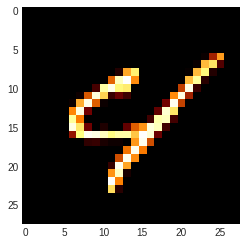

In [57]:
''' Affichage du tenseur: représente le chiffre 4 '''
plt.imshow(img_tensor[0], cmap='afmhot')
plt.show()

In [58]:
'''
Ici, on réorganise les dimensions du tenseur
de manière à obtenir le nombre d'image, les dimensions,
ainsi que l'espace colorimétrique (profondeur)
'''
img_tensor = img_tensor.reshape(-1, 28, 28, 1)
img_tensor.shape

(1, 28, 28, 1)

## Visualiser les couches d'activations du model

In [29]:
''' On récupère tous les layers du model '''
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<tf.Tensor 'conv2d_7/BiasAdd:0' shape=(?, 28, 28, 64) dtype=float32>,
 <tf.Tensor 'activation_9/Relu:0' shape=(?, 28, 28, 64) dtype=float32>,
 <tf.Tensor 'batch_normalization_8/cond/Merge:0' shape=(?, 28, 28, 64) dtype=float32>,
 <tf.Tensor 'conv2d_1_1/BiasAdd:0' shape=(?, 28, 28, 64) dtype=float32>,
 <tf.Tensor 'activation_1_1/Relu:0' shape=(?, 28, 28, 64) dtype=float32>,
 <tf.Tensor 'batch_normalization_1_1/cond/Merge:0' shape=(?, 28, 28, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'dropout_4/cond/Merge:0' shape=(?, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'conv2d_2_1/BiasAdd:0' shape=(?, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'activation_2_1/Relu:0' shape=(?, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'batch_normalization_2_1/cond/Merge:0' shape=(?, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'conv2d_3_1/BiasAdd:0' shape=(?, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'activation_3_1/Relu:0' shape=(?, 14, 14, 64) dtype=float32>

In [0]:
''' On demande au model de fournir en sortie ces layers '''
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [0]:
'''
Ensuite, on fait une prédiction sur notre image de test
pour obtenir les activations
'''
activations = activation_model.predict(img_tensor)

In [61]:
''' On sélectionne la première activation '''
first_layer_activation = activations[0]
'''
On peut voir que c'est une matrice 28x28
avec 64 canaux (la profondeur) correspondant
au nombre de filtres/kernels utilisés pour la
convolution
'''
print(first_layer_activation.shape)

(1, 28, 28, 64)


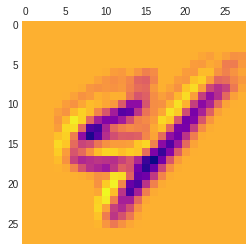

In [46]:
''' Affichage du 12e canal de la première activation '''
plt.matshow(first_layer_activation[0, :, :, 12], cmap='plasma')

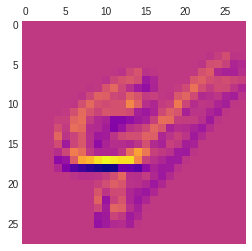

In [45]:
''' Affichage du 27e canal de la première activation '''
plt.matshow(first_layer_activation[0, :, :, 27], cmap='plasma')

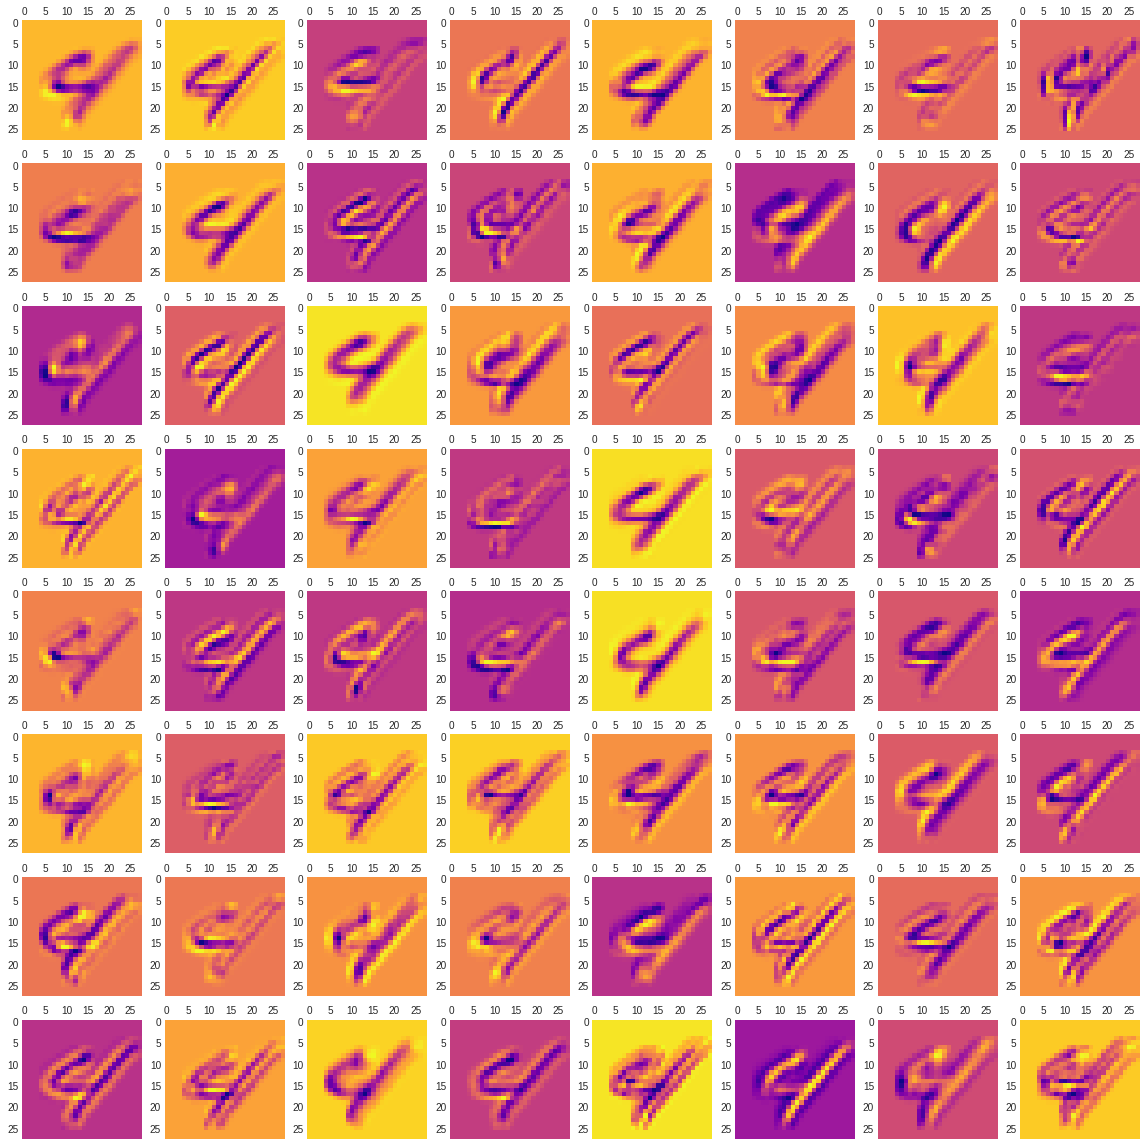

In [44]:
''' Affichage de tous les canaux de cette activation '''

fig, ax = plt.subplots(
    nrows=8, # number of rows
    ncols=8, # number of columns
    figsize=[16, 16]
)

for index, axi in enumerate(ax.flat):
  axi.matshow(first_layer_activation[0, :, :, index], cmap='plasma')

plt.tight_layout(True)
plt.show()

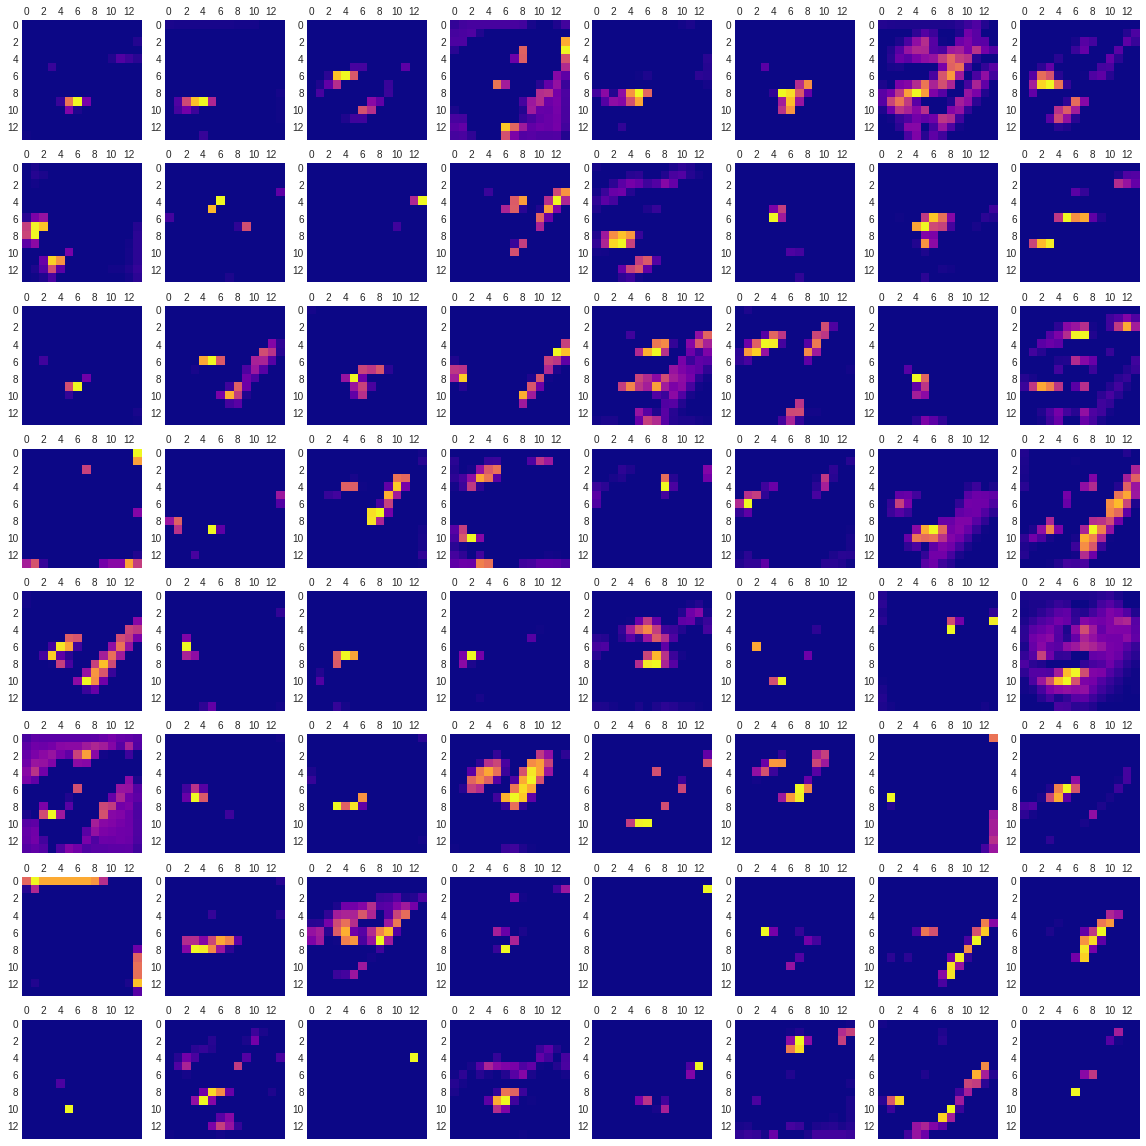

In [62]:
'''
On peut visualiser les layers plus "deep"
du model. On s'apercoit que les premières activations
sont une combinaisons de contours (lignes verticales/horizontales/diagonales...)

Puis on obtient des combinaisons de combinaisons qui forment
des ensembles de contours et des formes plus abstraites.
'''

fig, ax = plt.subplots(
    nrows=8, # number of rows
    ncols=8, # number of columns
    figsize=[16, 16]
)

for index, axi in enumerate(ax.flat):
  axi.matshow(activations[10][0, :, :, index], cmap='plasma')

plt.tight_layout(True)
plt.show()